# <font color='red'>SGD Algorithm to predict movie ratings</font>

**There will be some functions that start with the word "grader" ex: grader_matrix(), grader_mean(), grader_dim() etc, you should not change those function definition.<br><br>Every Grader function has to return True.**

<pre>
1. Download the data from <a href='https://drive.google.com/open?id=1-1z7iDB52cB6_JpO7Dqa-eOYSs-mivpq'> here </a>
2. The data will be of this format, each data point is represented as a triplet of user_id, movie_id and rating 
<table>
<tr><th>user_id</th><th>movie_id</th><th>rating</th></tr>
<tr><td>77</td><td>236</td><td>3</td></tr>
<tr><td>471</td><td>208</td><td>5</td></tr>
<tr><td>641</td><td>401</td><td>4</td></tr>
<tr><td>31</td><td>298</td><td>4</td></tr>
<tr><td>58</td><td>504</td><td>5</td></tr>
<tr><td>235</td><td>727</td><td>5</td></tr>
</table>

## <font color='red'>Task 1</font>

<font color='red'><b>Predict the rating for a given (user_id, movie_id) pair </b> </font>


Predicted rating $\hat{y}_{ij}$ for user i, movied j pair is calcuated as $\hat{y}_{ij} = \mu + b_i + c_j + u_i^T v_j$ , here we will be finding the best values of $b_{i}$ and $c_{j}$ using SGD algorithm with the optimization problem for N users and M movies is defined as

$$
L = \min_{ b, c, \{ u_i \}_{i=1}^N, \{ v_j \}_{j=1}^M}
\quad
\alpha \Big(
    \sum_{j} \sum_{k} v_{jk}^2 
    + \sum_{i} \sum_{k} u_{ik}^2 
    + \sum_{i} b_i^2
    + \sum_{j} c_i^2
    \Big)
+ \sum_{i,j \in \mathcal{I}^{\text{train}}}
    (y_{ij} - \mu - b_i - c_j - u_i^T v_j)^2
$$

<ul>
<li><span class="math">\(\mu\)</span> : scalar mean rating</li>
<li><span class="math">\(b_i\)</span> : scalar bias term for user <span class="math">\(i\)</span></li>
<li><span class="math">\(c_j\)</span> : scalar bias term for movie <span class="math">\(j\)</span></li>
<li><span class="math">\(u_i\)</span> : K-dimensional vector for user <span class="math">\(i\)</span></li>
<li><span class="math">\(v_j\)</span> : K-dimensional vector for movie <span class="math">\(j\)</span></li>
</ul>

 $ \ $





*.  We will be giving you some functions, please write code in that functions only.

*.  After every function, we will be giving you expected output, please make sure that you get that output. 





1. Construct adjacency matrix with the given data, assuming its  <a href='https://en.wikipedia.org/wiki/Bipartite_graph'> weighted un-directed bi-partited graph</a> and the weight of each edge is the rating given by user to the movie

<img src='https://i.imgur.com/rmUCGMb.jpg' width=200>

   you can construct this matrix like $A[i][j]=r_{ij}$ here $i$ is user_id, $j$ is movie_id and $r_{ij}$ is rating given by user $i$ to the movie $j$

   Hint : you can create adjacency matrix using <a href='https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html'> csr_matrix</a>

2. We will Apply SVD decomposition on the Adjaceny matrix <a href='https://stackoverflow.com/a/31528944/4084039'>link1</a>, <a href='https://machinelearningmastery.com/singular-value-decomposition-for-machine-learning/'> link2</a> and get three matrices $U, \sum, V$ such that $U \times \sum \times V^T = A$, <br> 
if $A$ is of dimensions $N \times M$ then <br>
U is of $N \times k$, <br>
$\sum$ is of $k \times k$ and <br>
$V$ is $M \times k$ dimensions. <br>

   *.  So the matrix $U$ can be represented as matrix representation of users, where each row $u_{i}$ represents a k-dimensional vector for a user

   *. So the matrix $V$ can be represented as matrix representation of movies, where each row $v_{j}$ represents a k-dimensional vector for a movie.
3. Compute $\mu$ , $\mu$  represents the mean of all the rating given in the dataset.(write your code in <font color='blue'>def m_u()</font>)
4. For each unique user initilize a bias value $B_{i}$ to zero, so if we have $N$ users $B$ will be a $N$ dimensional vector, the $i^{th}$ value of the $B$ will corresponds to the bias term for $i^{th}$ user (write your code in <font color='blue'>def initialize()</font>)

5. For each unique movie initilize a bias value $C_{j}$ zero, so if we have $M$ movies $C$ will be a $M$ dimensional vector, the $j^{th}$ value of the $C$ will corresponds to the bias term for $j^{th}$ movie (write your code in <font color='blue'>def initialize()</font>)

6. Compute dL/db_i (Write you code in <font color='blue'> def derivative_db()</font>)
7. Compute dL/dc_j(write your code in <font color='blue'> def derivative_dc()</font>

8. Print the mean squared error with predicted ratings.

<pre>
for each epoch:
    for each pair of (user, movie):
        b_i =  b_i - learning_rate * dL/db_i
        c_j =  c_j - learning_rate * dL/dc_j
predict the ratings with formula
</pre>
$\hat{y}_{ij} = \mu + b_i + c_j + \text{dot_product}(u_i , v_j) $

9. you can choose any learning rate and regularization term in the range $10^{-3}  \text{ to } 10^2$  <br>
  
10. __bonus__: instead of using SVD decomposition you can learn the vectors $u_i$, $v_j$ with the help of SGD algo similar to $b_i$ and $c_j$ 

<br>

 # <font color='red'>Task 2 </font>

As we know U is the learned matrix of user vectors, with its i-th row as the vector ui for user i. Each row of U can be seen as a "feature vector" for a particular user.

The question we'd like to investigate is this: do our computed per-user features that are optimized for predicting movie ratings contain anything to do with gender?

The provided data file <a href='https://drive.google.com/open?id=1PHFdJh_4gIPiLH5Q4UErH8GK71hTrzlY'>user_info.csv</a> contains an is_male column indicating which users in the dataset are male. Can you predict this signal given the features U?


> __Note 1__ : there is no train test split in the data, the goal of this assignment is to give an intution about how to do matrix factorization with the help of SGD and application of truncated SVD. for better understanding of the collabarative fillerting please check netflix case study. <br><br>
> __Note 2__ : Check if scaling of $U$, $V$ matrices improve the metric 

<br>


<br>

<font color='red'> Reading the csv file </font>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ratings_train.csv")
#data=data[:200]
data.head()

,user_id,item_id,rating
0,772,36,3
1,471,228,5
2,641,401,4
3,312,98,4
4,58,504,5


In [ ]:
data.shape

(89992, 3)

In [ ]:
print(len(data['user_id'].unique()))

943


In [ ]:
v_j=data['item_id']
u_i=data['user_id']

In [ ]:
rating=data['rating'].tolist()
movie_details=v_j.tolist()
user_details=u_i.tolist()

<font color='red'>Create your adjacency matrix </font>

In [ ]:
from scipy.sparse import csr_matrix
adjacency_matrix = csr_matrix((rating,(user_details,movie_details))).toarray()


In [ ]:
adjacency_matrix.shape

(943, 1681)

<font color='cyan'>Grader function - 1</font>

In [ ]:
def grader_matrix(matrix):
 assert(matrix.shape==(943,1681))
 return True
grader_matrix(adjacency_matrix)

True

<font color='red'> SVD decompostion</font>

Sample code for SVD decompostion

In [ ]:
from sklearn.utils.extmath import randomized_svd
import numpy as np
matrix = np.random.random((20, 10))
U, Sigma, VT = randomized_svd(matrix, n_components=5,n_iter=5, random_state=None)
print(U.shape)
print(Sigma.shape)
print(VT.T.shape)

(20, 5)
(5,)
(10, 5)


<font color='red'>Write your code for SVD decompostion</font>

In [ ]:
U, Sigma, VT = randomized_svd(adjacency_matrix, n_components=5,n_iter=5, random_state=None)
print(U.shape)
print(Sigma.shape)
print(VT.T.shape)

(943, 5)
(5,)
(1681, 5)


<font color='red'>Compute mean of ratings</font>

In [ ]:

def m_u(ratings):
   '''In this function, we will compute mean for all the ratings'''
    # you can use mean() function to do this
    # check this (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html) link for more details.
    return np.mean(ratings)    
        

In [ ]:
mu=m_u(data['rating'])
print(mu)

3.529480398257623


<font color='cyan'>Grader function -2 </font>

In [ ]:
def grader_mean(mu):
  #assert(np.round(mu,3)==3.66)
  assert(np.round(mu,3)==3.529)
  return True
mu=m_u(data['rating'])
grader_mean(mu)

True

<font color='red'>Initialize $B_{i}$ and $C_{j}$

Hint : Number of rows of adjacent matrix corresponds to user dimensions($B_{i}$), number of columns of adjacent matrix corresponds to movie dimensions ($C_{j}$)

In [ ]:
def initialize(dim):
 B=np.zeros(dim)
 return B

In [ ]:
dim = adjacency_matrix.shape[0] # give the number of dimensions for b_i (Here b_i corresponds to users)
b_i=initialize(dim)

In [ ]:
dim= adjacency_matrix.shape[1]
c_j=initialize(dim)

<font color='cyan'>Grader function -3 </font>

In [ ]:
def grader_dim(b_i,c_j):
  assert(len(b_i)==943 and np.sum(b_i)==0)
  assert(len(c_j)==1681 and np.sum(c_j)==0)
  return True
grader_dim(b_i,c_j)

True

In [ ]:
print(adjacency_matrix[312][98])

4


<font color='red'>Compute dL/db_i</font>

In [ ]:
def derivative_db(user_id,item_id,rating,U,V,mu,alpha):
 dL_db_i = alpha * 2*b_i[user_id] - (2*(rating-mu-b_i[user_id]-c_j[item_id]-np.dot(U[user_id],np.transpose(V)[item_id])))
 return dL_db_i

<font color='cyan'>Grader function -4 </font>

In [ ]:
def grader_db(value):
  assert(np.round(value,3)==-0.931)
  return True
U1, Sigma, V1 = randomized_svd(adjacency_matrix, n_components=2,n_iter=5, random_state=24)
alpha=0.0001
value=derivative_db(312,98,4,U1,V1,mu,alpha)
print(value)
grader_db(value)

-0.9308283758773337


True

<font color='red'>Compute dL/dc_j</font>

In [ ]:
def derivative_dc(user_id,item_id,rating,U,V,mu,alpha):
  dL_dc_j = alpha * 2*c_j[item_id] - (2*(rating-mu-b_i[user_id]-c_j[item_id]-np.dot(U[user_id],np.transpose(V)[item_id])))
  return dL_dc_j

<font color='cyan'>Grader function - 5 </font>

In [ ]:
def grader_dc(value):
  assert(np.round(value,3)==-2.929)
  return True
U1, Sigma, V1 = randomized_svd(adjacency_matrix, n_components=2,n_iter=5, random_state=24)
r=0.01
value=derivative_dc(58,504,5,U1,V1,mu,0.01)
grader_dc(value)

True

<font color='red'>Compute MSE (mean squared error) for predicted ratings</font>


for each epoch, print the MSE value

<pre>
for each epoch:

    for each pair of (user, movie):

        b_i =  b_i - learning_rate * dL/db_i

        c_j =  c_j - learning_rate * dL/dc_j

predict the ratings with formula
</pre>

$\hat{y}_{ij} = \mu + b_i + c_j + \text{dot_product}(u_i , v_j) $

In [ ]:
print(np.array(data)[0])

[772  36   3]


In [ ]:
# user_details=data['user_id'].values
# movie_details=data['item_id'].values
# rating=data['rating'].values
# b=initialize(adjacency_matrix.shape[0])
# c=initialize(adjacency_matrix.shape[1])
# lr=0.0001
# alpha=0.001
# epochs=50
# MSE1=[]
# VT=np.transpose(V1)
# for epoch in range(epochs):
# sum=0
# y_pred=[]
# y=[]
# for i,j,k in zip(user_details,movie_details,rating):
# b[i]=b[i]-lr* derivative_db(i,j,k,U1,V1,mu,alpha)
# c[j]=c[j]-lr* derivative_dc(i,j,k,U1,V1,mu)
# y_i_j=(mu+ b[i]+ c[j]+ np.dot(U1[i],VT[j]))
# y_pred.append(y_i_j)
# mse=mean_squared_error(rating,y_pred)
# print(epoch+1,"MSE",mse)
# MSE1.append(mse)
from sklearn.metrics import mean_squared_error
def compute_mse(data,U,V,mu,alpha):
  y_true = data['rating']
  mse = []
  for epoch in range(100):
    for each_point in np.array(data):
      b_i[each_point[0]] = b_i[each_point[0]] - 0.001 *derivative_db(each_point[0],each_point[1],each_point[2],U,V,mu,alpha)
      c_j[each_point[1]] = c_j[each_point[1]] - 0.001 *derivative_dc(each_point[0],each_point[1],each_point[2],U,V,mu,alpha)
    y_pred = []
    for point in np.array(data):#zip(data['user_id'],data['item_id']):
        y_pred.append(mu + b_i[point[0]] + c_j[point[1]] + np.dot(U[point[0]], V.T[point[1]]))
    loss = mean_squared_error(y_true, y_pred)
    mse.append(loss)
    if epoch%10 == 0:
        print("the mse: ",loss,"epoch: ",epoch)
  return mse
alpha=0.01
mse = compute_mse(data,U1,V1,mu,alpha)

the mse:  0.8324529134183549 epoch:  0
the mse:  0.8324422462245784 epoch:  10
the mse:  0.832416284786805 epoch:  20
the mse:  0.8323898880056828 epoch:  30
the mse:  0.8323645740472949 epoch:  40
the mse:  0.832340513963913 epoch:  50
the mse:  0.8323176902983359 epoch:  60
the mse:  0.8322960437035887 epoch:  70
the mse:  0.8322755053690893 epoch:  80
the mse:  0.8322560066547171 epoch:  90


<font color='red'>Plot epoch number vs MSE </font>

* epoch number on X-axis
* MSE on Y-axis

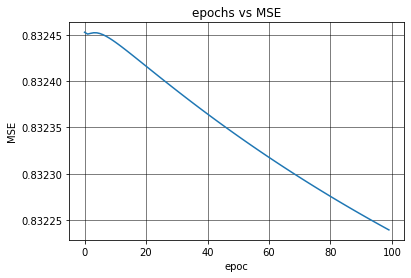

In [ ]:
import matplotlib.pyplot as plt
epoc=np.array(list(range(100)))
plt.plot(epoc,mse)
plt.xlabel("epoc")
plt.ylabel("MSE")
plt.title("epochs vs MSE")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

<br>

<font color='red'> Task 2</font>

In [ ]:
data1=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/user_info.csv.txt')
data1.head()

,user_id,age,is_male,orig_user_id
0,0,24,1,1
1,1,53,0,2
2,2,23,1,3
3,3,24,1,4
4,4,33,0,5


In [ ]:
df2 = pd.DataFrame(data = U1,)
X=df2

In [ ]:
df2['is_male']=data1['is_male']
df2.head()
y=df2['is_male']

In [ ]:
X=X.drop('is_male',axis='columns')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

In [ ]:
y_pred=clf.predict(X_test)

Test confusion matrix
[[  0  83]
 [  0 200]]


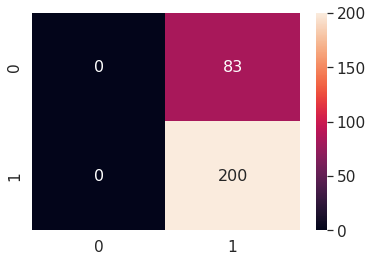

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, y_pred))
conf_matr_df_test = pd.DataFrame(confusion_matrix(y_test, y_pred))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test, annot=True,annot_kws={"size": 16}, fmt='g')